In [ ]:
# import for the modeling libraries required

import pandas as pd              # for loading and handling datasets 
import numpy as np               # for numerical operations, arrays, and math functions
import matplotlib.pyplot as plt  # for plotting graphs and visualizations
import seaborn as sns            # for statistical data visualization

# scikitlearn modules for modeling and evaluation

from sklearn.model_selection import train_test_split  # for splitting dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor    # random forest model for regression
from sklearn.metrics import mean_squared_error, r2_score  # metrics to evaluate model performance

In [26]:
# open the given dataset

# load the given dataset into a dataframe, "df"
df = pd.read_csv("electricity_bill_dataset.csv")

# then display the first 5 rows to explore the given dataset, for any possibilty of feature enggineering
print(" First 5 rows of the dataset:")
print(df.head())

# check the shape of the dataset
print("\n dataset shape:", df.shape)

 First 5 rows of the dataset:
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4          

In [27]:
# displaying a concise summary of the given dataset. this will give non null counts and data types
df.info()

# displays statistics of each column(feature)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [28]:
# since ml models don't understand string inputs, we have to convert them to numerical inputs
# for example, if there is a feature, say 'Gender', with two types, 'Male' and 'Female'
# we code 0 as 'Male' and 1 as 'Female'. this is called label encoding. helps ml models a lot.

# here, 'City' and 'Company' are being label encoded
df['City'] = df['City'].astype('category').cat.codes
df['Company'] = df['Company'].astype('category').cat.codes

# this line checks for any missing values in each column
print(df.isnull().sum())

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [ ]:
# feature engineering:
# feature engineering means creating new meaningful features from existing ones
# for example: With length and breadth, one can create area = length * breadth. area is more useful sometimes.

# here, we have monthly hour usage and cost per hour, we multiply them to get monthly bill
# but we dont have cost per hour exactly, instead we have cost per kWh. but this doesn't matter much since units don't matter in ml models
#df["approx_monthly_bill"] = df["MonthlyHours"] * df["TariffRate"] this isn't exact month bill, but it sure does give an idea

# approx_monthy_bill wasn't added since it was the exact formula for the electrcity bill and didnt make the model learn

# creating total number of appliances by adding all appliance columns
df["totalAppliances"] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)

df['CostPerAppliance'] = df['ElectricityBill'] / df["totalAppliances"]
# can also check if its summer
# this is a binary feature just 0 or 1 that tells the model whether the month is a summer month or not
'''df['IsSummer'] = df['Month'].isin([3,4,5]).astype(int) #march,april,may

this was taken out since it didnt affect the prediction'''

"df['IsSummer'] = df['Month'].isin([3,4,5]).astype(int) #march,april,may\n\nthis was taken out since it decreased the prediction"

In [ ]:
# now splitting the data into inputs X and output y
# X and y are data fed into the model, this makes it learn input X to output y
X = df.drop('ElectricityBill', axis=1)   
y = df['ElectricityBill']                

# now we divide the data into training and testing sets(80:20)
# over 45k datasets are given, so 36k go for training the ml model and 9k for testing the ml model
# training set = like preparing for the exam(training data)
# testing set = actual exam to see how well the model studied(r2 score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# here we create the model, different models, study data differently
model = RandomForestRegressor() # random forest is a group of decision trees,each decision tree gives an output, what the bill might be
                                # these reduce overfitting as its not dependent on one tree

''' why randomforest >> linear regression
 linear reg tries to draw a straight line through the data
 the relationships can be complex and non-linear

 randomforest can automatically capture nonlinear patterns and interactions between features
 thats why randomforest often gives much better accuracy than linear reg in practical problems
 creates multiple decision trees using random subsets of:
	•	rows from the dataset
	•	features
	•	each tree gives a prediction for a given input.
	•	the final prediction is the average of all the trees outputs.'''

# now we train the model
model.fit(X_train, y_train)

# once trained, we give the model some datasets, asking it to predict and storing it in y_pred
y_pred = model.predict(X_test)

RMSE: 5.276358378967614
R2 Score: 0.9999755665317055


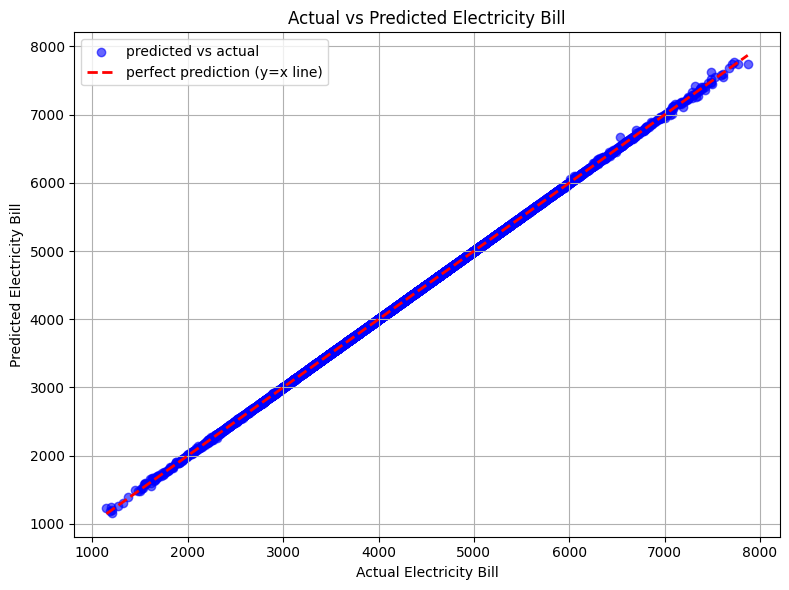

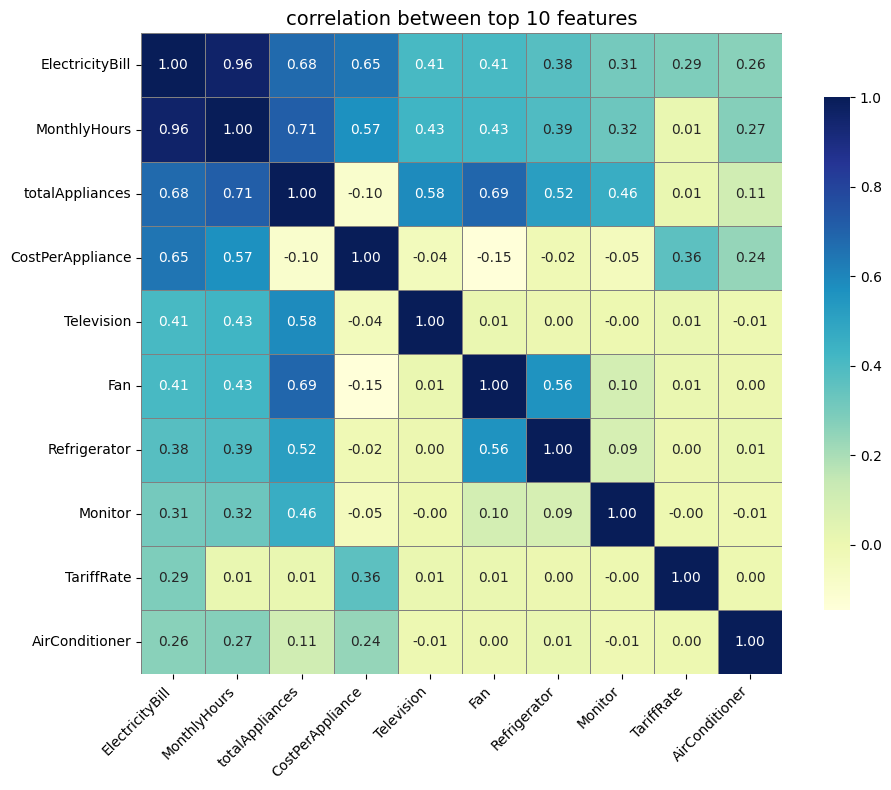

In [33]:
# first, we calculate rmse,root mean squared error)
# this tells how far off our predictions are from actual values
# lower the error, better the model is good in predicting
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# now we calculate r2 score
# this tells how well our model explains the variance in the data
# closer to 1, better
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

#  visualizing our model's predictions vs the actual values, we use matplotlib for this
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='predicted vs actual')  # blue dots = model predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='perfect prediction (y=x line)')  # red line = perfect prediction
plt.xlabel("Actual Electricity Bill")
plt.ylabel("Predicted Electricity Bill")
plt.title("Actual vs Predicted Electricity Bill")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# now i’m calculating feature correlations
# checking if approx_monthly_bill exists, and dropping it only if it does
df_for_corr = df.copy()
if 'approx_monthly_bill' in df_for_corr.columns:
    df_for_corr = df_for_corr.drop(columns=['approx_monthly_bill'])

# getting top 10 features most correlated with ElectricityBill
corr_matrix = df_for_corr.corr()
top_features = corr_matrix['ElectricityBill'].abs().sort_values(ascending=False).head(10).index

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="YlGnBu", 
            linewidths=0.5, 
            linecolor='gray', 
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title("correlation between top 10 features", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# good prediction--> closer the blue dots are to the y=x line
# bad prediction--> farther the blue dots are to the y=x line